<a href="https://colab.research.google.com/github/NehirSerin/YOLO-cell/blob/main/ultraYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [ ]:
!unzip /content/cellYOLO.v1i.yolov7pytorch.zip -d /content

Archive:  /content/cellYOLO.v1i.yolov7pytorch.zip
  inflating: /content/README.dataset.txt  
  inflating: /content/README.roboflow.txt  
  inflating: /content/data.yaml      
   creating: /content/train/
   creating: /content/train/images/
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-12_png.rf.539f978cf3193d61c6511eaeadf57fc0.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-15-A-Kopya-Kopya_png.rf.c1ccac7691fcf7eb6d5d1de7ef0ac095.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-2-A_png.rf.cc6f5383c87489fbb5053223cf21380d.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-3_png.rf.6860d5bf94c47976466645972acdd9cd.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-6-A_png.rf.308498a9b301fbda20144ad42a99009b.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-02_1-6-B_png.rf.fa4a4866680b3b4f06ec8d3754a1e149.jpg  
 extracting: /content/train/images/Image__2021-01-28__15-49-

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 11.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.8MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 234 images, 0 backgrounds, 0 corrupt: 100%|██████████| 234/234 [00:00<00:00, 2173.96it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 1800.08it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.17G      1.696      2.605      1.575         71        640: 100%|██████████| 15/15 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         59        322      0.967      0.541      0.819      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.04G      1.395      1.187      1.279         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         59        322      0.852      0.897      0.902      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.07G      1.278     0.9539      1.219         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         59        322      0.898      0.938      0.957      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.08G      1.289     0.8872      1.221        109        640: 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         59        322      0.919      0.953      0.964      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.05G      1.321     0.9044       1.24         93        640: 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         59        322      0.892      0.963      0.951      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.04G      1.286     0.8711      1.229         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         59        322      0.915      0.938      0.944      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.03G      1.264     0.8241      1.201        120        640: 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         59        322      0.834      0.918       0.89      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.09G      1.235     0.7795       1.18        106        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         59        322      0.912      0.944      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.06G      1.271     0.7878      1.195         79        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         59        322      0.893      0.958      0.965      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.05G      1.297     0.7859      1.221         87        640: 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         59        322      0.913      0.953       0.95      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.01G      1.247     0.7701      1.205         95        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         59        322      0.914      0.944      0.967      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.04G      1.239     0.7493      1.198         81        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         59        322      0.919      0.944      0.959      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.05G      1.246      0.707      1.182        112        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         59        322      0.903      0.957      0.952      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.07G      1.213     0.6918      1.166        131        640: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         59        322      0.911      0.958      0.961      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.04G      1.199     0.6878      1.169        121        640: 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         59        322      0.928      0.965      0.967      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.09G      1.216     0.6761       1.18         76        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         59        322      0.916      0.953      0.955      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.08G      1.212     0.6728      1.187        106        640: 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         59        322      0.927      0.952      0.964      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.04G      1.198     0.6731      1.169         91        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         59        322      0.876      0.966      0.959      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.04G      1.206     0.6619      1.176        106        640: 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         59        322      0.936      0.957      0.967      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.09G      1.194     0.6501      1.174         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         59        322        0.9      0.975      0.951      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.05G      1.193     0.6354      1.172        107        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         59        322      0.923       0.95      0.959      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.07G      1.197     0.6401      1.186         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         59        322      0.904      0.968       0.95      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.04G      1.202     0.6518      1.202         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         59        322      0.928      0.947      0.966       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.04G      1.205     0.6458      1.188         92        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59        322      0.916      0.969      0.966      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.08G        1.2     0.6499      1.195         88        640: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         59        322      0.918       0.96      0.968      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.05G      1.209     0.6494      1.196        108        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         59        322      0.918      0.966      0.966      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.05G      1.179     0.6312      1.191         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         59        322      0.936      0.955      0.968      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.06G      1.192     0.6076      1.169        110        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         59        322      0.919      0.978      0.961      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.05G      1.181     0.6295      1.184        117        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         59        322      0.945      0.956      0.967      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.06G      1.167      0.581      1.161        112        640: 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         59        322      0.933       0.96      0.965      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.04G       1.17      0.601      1.171         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         59        322      0.939       0.95      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.06G      1.168     0.5874      1.168         92        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         59        322       0.93      0.969      0.975      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.04G      1.167     0.5858      1.165         92        640: 100%|██████████| 15/15 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         59        322      0.936      0.953      0.971      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.09G      1.179     0.5897      1.174        115        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         59        322      0.911      0.975      0.964      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.03G      1.152     0.5854      1.163         97        640: 100%|██████████| 15/15 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         59        322      0.922      0.957      0.967      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.06G      1.167     0.5755       1.17         81        640: 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         59        322      0.933      0.966      0.968      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.06G      1.177     0.5699      1.166         97        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         59        322      0.919      0.981      0.953      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.06G      1.153     0.5611      1.174         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         59        322      0.913      0.984      0.952      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.03G      1.142     0.5527      1.146         72        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         59        322      0.926      0.963      0.966      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.04G       1.13     0.5565      1.158        122        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         59        322      0.934      0.969      0.967      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.05G      1.138     0.5599      1.168         92        640: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         59        322      0.934      0.975      0.967      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.06G      1.125      0.545      1.156         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         59        322      0.918      0.991      0.975      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.04G      1.137     0.5538      1.157         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         59        322        0.9      0.994      0.974      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.07G      1.109      0.553      1.151         79        640: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59        322      0.923      0.965      0.967      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.06G      1.133     0.5604      1.173         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         59        322      0.926      0.975      0.972      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.04G      1.129     0.5545      1.165         81        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         59        322      0.935      0.986       0.97      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.05G      1.134     0.5481      1.146        105        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         59        322      0.924      0.976      0.974      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.08G       1.14     0.5577      1.154         86        640: 100%|██████████| 15/15 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         59        322      0.937       0.97      0.974      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.07G      1.099     0.5384      1.136        131        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         59        322      0.939      0.962      0.972      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.02G      1.127     0.5463      1.149         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         59        322      0.931      0.958      0.969      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.04G      1.107     0.5428      1.153         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         59        322      0.923      0.972      0.974      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.08G      1.084     0.5197      1.128         95        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         59        322      0.934      0.973      0.975      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.09G      1.101     0.5352      1.146         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         59        322      0.926      0.971      0.974      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.02G      1.108     0.5346      1.154        105        640: 100%|██████████| 15/15 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         59        322      0.916      0.982      0.972      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.05G       1.08     0.5163      1.132        101        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         59        322      0.908      0.997       0.97      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.06G      1.088     0.5167      1.141         80        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         59        322      0.913      0.991      0.975      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.06G      1.127     0.5398      1.171         92        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         59        322      0.904      0.997      0.974       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.08G      1.109     0.5303      1.148        101        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         59        322      0.922      0.978      0.975      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.04G      1.108     0.5392      1.155         74        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         59        322      0.925      0.966      0.972      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.1G        1.1     0.5235      1.147         77        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         59        322      0.924      0.987      0.968       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.04G      1.113     0.5317      1.156         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         59        322      0.932      0.975      0.966      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.05G      1.115     0.5308      1.153         98        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         59        322      0.914      0.994       0.97      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.04G      1.105      0.524      1.158         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         59        322      0.944      0.975      0.973       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.07G       1.08     0.5138      1.139         81        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         59        322      0.936      0.957      0.976      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.04G      1.085     0.5253      1.153        114        640: 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         59        322      0.944      0.938      0.975      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.05G       1.07     0.5145      1.134         96        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         59        322       0.92      0.972      0.976      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.05G       1.06     0.5005      1.126        124        640: 100%|██████████| 15/15 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         59        322      0.931      0.962      0.976      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.08G      1.095     0.5161      1.146         86        640: 100%|██████████| 15/15 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         59        322       0.94      0.979      0.978      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.04G      1.085     0.5194       1.14        105        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         59        322      0.914      0.994      0.979       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.06G      1.076      0.513      1.132         98        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         59        322      0.923      0.981      0.973      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.07G       1.07     0.4965      1.129        118        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         59        322      0.937      0.962      0.974      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.08G       1.05     0.4916      1.132         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         59        322      0.933      0.978       0.97      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.05G      1.068     0.5054      1.139         98        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         59        322      0.924      0.982      0.976      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.04G      1.042     0.4803      1.122         86        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         59        322      0.941      0.966      0.976       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.05G      1.039     0.4858      1.124         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         59        322      0.922      0.988      0.978      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.07G       1.05     0.4857      1.124        119        640: 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         59        322      0.938      0.972      0.976       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.06G      1.061      0.485       1.12        106        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         59        322      0.932       0.98      0.978      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.04G      1.038     0.4778      1.126         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         59        322      0.922      0.989      0.977      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.04G      1.029     0.4829      1.128         98        640: 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         59        322      0.921      0.994      0.979       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.06G      1.038     0.4901      1.125         89        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         59        322       0.94      0.966       0.98      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.07G      1.027     0.4838      1.121         93        640: 100%|██████████| 15/15 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         59        322      0.927       0.99      0.979      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.04G      1.044     0.4901      1.134         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         59        322       0.94      0.976      0.977      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.01G       1.04     0.4834       1.12         76        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         59        322      0.949      0.974       0.98      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.06G      1.034     0.4763      1.137         67        640: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         59        322      0.948      0.962      0.981      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.05G      1.031     0.4692      1.127         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         59        322      0.925      0.978      0.981      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.07G      1.031     0.4902      1.116        133        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         59        322      0.934      0.966       0.98      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.06G       1.04      0.475      1.121         95        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         59        322      0.945      0.969      0.981      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.04G      1.025     0.4634      1.115         88        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         59        322      0.932      0.979       0.98      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.05G      1.014     0.4713      1.121        110        640: 100%|██████████| 15/15 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         59        322      0.917      0.996       0.98      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.04G       1.02     0.4794      1.132         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         59        322      0.923      0.978       0.98      0.679


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.03G      1.022     0.4485       1.12         68        640: 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         59        322      0.919      0.981       0.98      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.04G      1.033     0.4462      1.117         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         59        322      0.919      0.988       0.98      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.04G      1.021     0.4386      1.109         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         59        322      0.922      0.985      0.981      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.02G      1.004     0.4313      1.114         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         59        322      0.943      0.963      0.979      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.03G      1.008     0.4297      1.111         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         59        322      0.948      0.969       0.98      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.04G     0.9935      0.414        1.1         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         59        322      0.938      0.969       0.98      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.02G     0.9909     0.4205      1.094         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         59        322      0.937      0.969       0.98       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.04G     0.9904     0.4248      1.099         54        640: 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         59        322      0.937      0.974      0.978      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.02G     0.9746     0.4081      1.096         59        640: 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         59        322      0.937      0.975      0.978      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.04G      0.979     0.4155      1.101         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         59        322      0.937      0.973      0.978      0.677



100 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


                   all         59        322      0.942      0.963      0.979      0.682
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e09ffd8a4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/yolov7_best.pt

cp: cannot stat 'runs/train/exp/weights/best.pt': No such file or directory


In [ ]:
from google.colab import files
!zip -r best_model.zip /content/runs/detect/train4/weights/best.pt
files.download('best_model.zip')

  adding: content/runs/detect/train4/weights/best.pt (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload() #upload "best_model.zip"

Saving best_model (1).zip to best_model (1).zip


In [ ]:
!unzip /content/best_model (1).zip -d /content/yolov7/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/best_model (1).zip -d /content/yolov7/'



image 1/1 /content/Image__2021-01-28__15-49-02_1-6-B.png: 640x640 6 cells, 7.8ms
Speed: 4.1ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


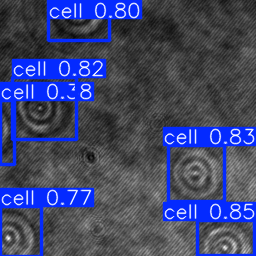

In [ ]:
# Load your trained model
model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Run inference on an image
results = model('/content/Image__2021-01-28__15-49-02_1-6-B.png', device=0)

results1 = results[0]
results1.show()

In [ ]:
for result in results:
    boxes = result.boxes.xyxy
    print(boxes)

tensor([[1.9741e+02, 2.2003e+02, 2.5444e+02, 2.5594e+02],
        [1.6874e+02, 1.4541e+02, 2.2488e+02, 2.0152e+02],
        [1.2027e+01, 7.7320e+01, 7.6030e+01, 1.3922e+02],
        [4.8896e+01, 3.8577e-02, 1.0997e+02, 4.0038e+01],
        [2.5827e-02, 2.0636e+02, 4.1984e+01, 2.5600e+02],
        [3.5799e-02, 1.0099e+02, 1.4492e+01, 1.6411e+02]], device='cuda:0')
